# Linear Regression with Polynomial Terms
Functional Forms for parametric models (Although this notebook only includes linear Regression with polynomial terms) 

* linear (linear): $y = a + b*x$
* logarithmic (log): $y = a + b*log(x)$
* exponential (exp): $y = a + eb*x$
* power (pow): $y = a*xb$
* quadratic (quad): $y = a + b*x + c*x2$
* polynomial (poly): $y = a + b * x + … + k*xorder$


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## Simple Implementation

In [2]:
X, y = make_regression(
    n_samples=100, 
    n_features=1, 
    n_informative=10, 
    n_targets=1,
    bias=100, 
    effective_rank=None, 
    tail_strength=0.5, 
    noise=10, 
    shuffle=True, 
    coef=False, 
    random_state=None
)

data = np.hstack((X, y.reshape(-1, 1)))

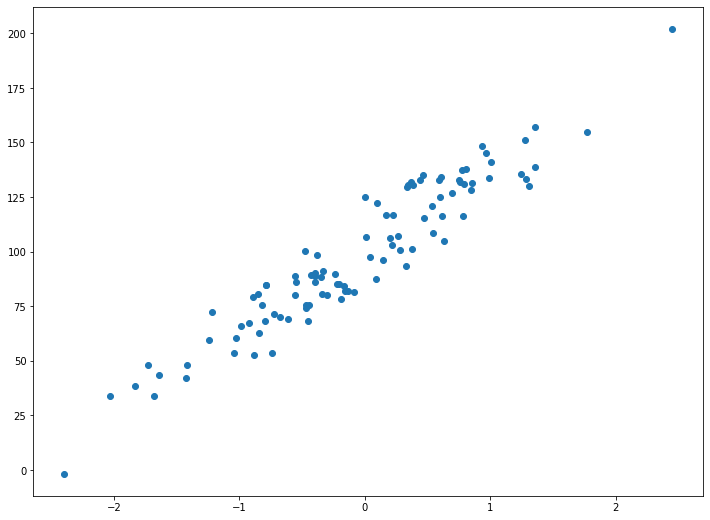

In [3]:
# Making the imports
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
X = data[:, 0]
Y = data[:, 1]
plt.scatter(X, Y)
plt.show()



## Own Implementation

In [4]:
class LinearRegressionUnivariate():
    def __init__(
        self, 
        degree=1,
        alpha=0.01, 
        tol=1e-2, 
        max_iter=1e5,
        regularize=True,
        reg_lambda = 0.01,
        norm="L2", 
        include_bias=True, 
        verbose=True, 
    ): 
        self.degree = degree
        self.alpha = alpha 
        self.tol = tol
        self.max_iter = max_iter
        self.verbose = verbose
        self.regularize = regularize
        self.reg_lambda = reg_lambda
        self.include_bias = include_bias
        self.norm = norm 
        
        
    def fit(self, X, y):
        # Degree + Bias
        #theta = np.random.randn(self.degree + 1 if self.include_bias == True else self.degree)
        self._norm_mapper = {
            "L1": self.L1,
            "L2": self.L2
        }
        self.mses = []
        i = 1
        scaled_X, theta, lrs = self._create_scaled_x_vec(X)
        while True:
            i += 1
            y_hat = theta @ scaled_X
            error = y_hat - y
            
            # Mutiply each row of X_scaled with the scalar of its 
            # Error (error-scaling) and divide the sum by N.
            # -> error is a 1D vector for each x in X
            # -> mutiply each row x of X with error
            # -> divide by the number of samples in X
            # -> take the sum for the error. The result is an error-vectors
            #    with shape (1, len(x))
            gradient = np.sum(
                ((scaled_X.T * error.reshape(-1, 1)) / len(scaled_X)), 
                axis=0
            )
            new_theta = []
            
            for c in range(0, len(theta)):
                #curr_alpha = self.alpha**(c + 1)
                #update = curr_alpha * gradient[c]
                update = lrs[c] * gradient[c]
                curr_theta = theta[c] - update
                new_theta.append(curr_theta) 
            
            mse = self.MSE(y, y_hat)
            self.mses.append(mse)
            self.theta = theta = np.asarray(new_theta)
            
            if self.verbose == True: 
                if i % 10000 == 0: 
                    print("MSE at Iteration \t {}: \t{}".format(i, mse))
            
            if i >= self.max_iter: 
                print("Stopping at Iteration: {}".format(i))
                break
    
    def predict(self, X): 
        scaled_X = self._create_scaled_x_vec(X, _return_thetas_lrs=False)
        y_hat = self.theta @ scaled_X
        return y_hat
        
    
    def _create_scaled_x_vec(self, X, _return_thetas_lrs=True):
        """
        Arguments
        =========
        X: Array
            1-D array with the values for x
        Returns
        =======
        A 2-D vector with the scaling operations applied where the columns
        are x scaled by the degree of the polynomial 
        """
        assert X.ndim == 1
        
        ###################
        # Polynomial Part #
        ###################
        
        n_terms = self.degree + 1 if self.include_bias == True else self.degree
        
        x_scaled = np.vstack(((X.ravel()**n) for n in range(1, self.degree + 1))).T
        # Fist column is going to be the bias-term with only ones
        if self.include_bias == True: 
            x_scaled = np.c_[np.ones(x_scaled.shape[0]), x_scaled]
        
        thetas = np.zeros(n_terms)
        lrs = [self.alpha**(c + 1) for c in range(n_terms)]
        
        
        ##########
        # Return #
        ##########
        
        if _return_thetas_lrs == True:  
            return x_scaled.T, thetas, lrs
        return x_scaled.T
    

    def L1(self, theta): 
        return np.sum(np.abs(theta))
    
    def L2(self, theta): 
        return np.asarray(theta) @ np.asarray(theta).T
    
    def MSE(self, y, y_hat):
        return sum((y_hat - y)**2)/len(y)

In [5]:
#Choosing the Degree extra high; we are only trying to fit a line with an intercept here!
lin_reg = LinearRegressionUnivariate(verbose=True, degree=12, alpha=0.11)
lin_reg.fit(X, Y)

/home/alexander/mlactive/lib/python3.6/site-packages/ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


MSE at Iteration 	 10000: 	101.03742222939408
MSE at Iteration 	 20000: 	100.42602171098203
MSE at Iteration 	 30000: 	100.27937151863182
MSE at Iteration 	 40000: 	100.18758110247914
MSE at Iteration 	 50000: 	100.12020781099416
MSE at Iteration 	 60000: 	100.06935390547196
MSE at Iteration 	 70000: 	100.03015320786744
MSE at Iteration 	 80000: 	99.99920426670637
MSE at Iteration 	 90000: 	99.9741051247855
MSE at Iteration 	 100000: 	99.9531582746594
Stopping at Iteration: 100000


/home/alexander/mlactive/lib/python3.6/site-packages/ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


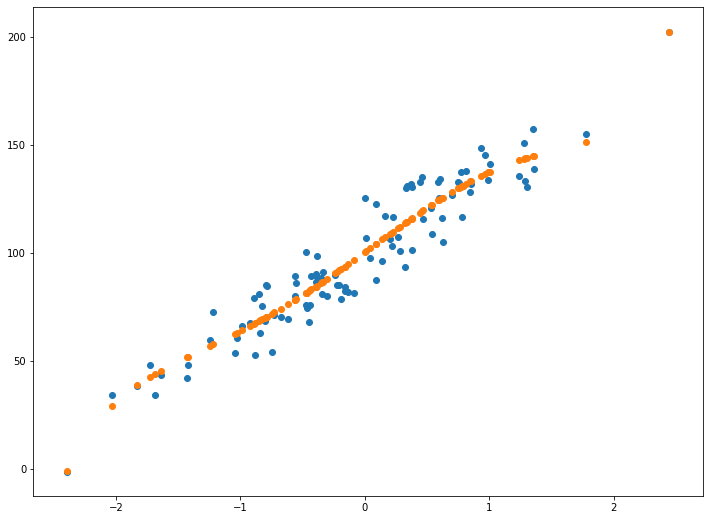

In [6]:
X_pred = lin_reg.predict(X)
plt.scatter(X, y)
plt.scatter(X, X_pred)

### Fitting a Polynomial

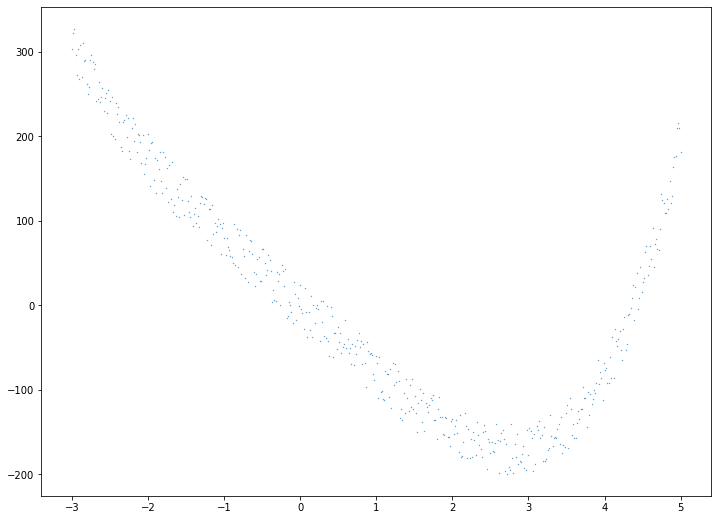

In [7]:
f = lambda x: x**4 - 3*x**2 + 2*x**2 - 8*x * 10
X = np.linspace(-3, 5, 500)
y = np.asarray(list(map(f, X)))
y = y + np.random.uniform(low=-30, high=30, size=(len(y),))
plt.scatter(X, y, s=0.1)

In [8]:
lin_reg = LinearRegressionUnivariate(
    degree=4, 
    verbose=True, 
    alpha=0.001,
    max_iter=1e5,
    include_bias=False
)
lin_reg.fit(X, y)

/home/alexander/mlactive/lib/python3.6/site-packages/ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


MSE at Iteration 	 10000: 	2437.3428230557406
MSE at Iteration 	 20000: 	1949.5359627588532
MSE at Iteration 	 30000: 	1600.1109081292677
MSE at Iteration 	 40000: 	1349.7782768755708
MSE at Iteration 	 50000: 	1170.4037676745977
MSE at Iteration 	 60000: 	1041.8409983197569
MSE at Iteration 	 70000: 	949.6635676600822
MSE at Iteration 	 80000: 	883.5410328035321
MSE at Iteration 	 90000: 	836.0759805125476
MSE at Iteration 	 100000: 	801.9712784631632
Stopping at Iteration: 100000


/home/alexander/mlactive/lib/python3.6/site-packages/ipykernel_launcher.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


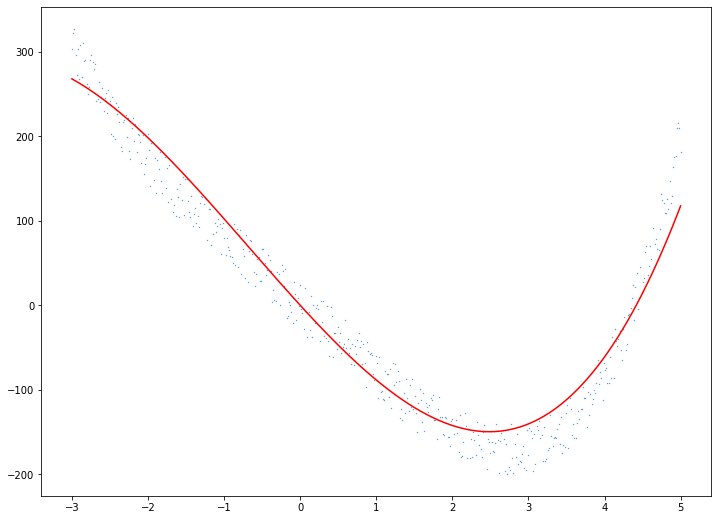

In [9]:
X_pred = lin_reg.predict(X)
plt.scatter(X, y, s=0.1)
plt.plot(X, X_pred, c="r")